In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sleep-health-and-lifestyle-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3321433%2F6491929%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240604%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240604T091029Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D01b67a6686a5179581448ea33885b38235c933908526ce45de9178c753edd77c0f9fa1d5f4a449a06eba96a4192af7538d5537c7e6853dbe7e532bef35edf7eb97a0195d1ea090a7013bf50bc1461e95b55a27ab4929e5360a0bbd73067306b571bccf6335042467022b9b6c3140215c8841cc12a0b5570cea09d2c9d750d01e4093cfac13c9ba9ea0b68322012c8a26f4e61e6bfd0f1a602c0c9195b9728010a37303e6832c7e6f3c96bd380d31df9faab45c3f8051523fb7edf1d92e3a1fc73af59aea8db403e82dbe6786f53153d71bbe9f6366eef0ff91ffeb0763ef6398b59b29380d19832729205d0fbc0879c14330e925e5ebe339295e27e9cd84181a'

KAGGLE_INPUT_PATH='kaggle/input'
KAGGLE_WORKING_PATH='kaggle/working'
KAGGLE_SYMLINK='kaggle'

os.makedirs(KAGGLE_SYMLINK)
os.makedirs(KAGGLE_INPUT_PATH, 0o777)
os.makedirs(KAGGLE_WORKING_PATH, 0o777)

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2604 bytes downloaded
Downloaded and uncompressed: sleep-health-and-lifestyle-dataset
Data source import complete.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas_gbq as pg


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pg.read_gbq('SELECT * FROM `baidao-test-666808.sleep_dataset.Sleep_health_and_lifestyle_dataset-2` LIMIT 1000',
                  project_id='baidao-test-666808')

Downloading: 100%|██████████|


In [13]:
#df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

In [14]:
df.head()

AttributeError: 'Index' object has no attribute '_format_flat'

   Person_ID Gender  Age Occupation  Sleep_Duration  Quality_of_Sleep  \
0         14   Male   29     Doctor             6.0                 6   
1         15   Male   29     Doctor             6.0                 6   
2         16   Male   29     Doctor             6.0                 6   
3         18   Male   29     Doctor             6.0                 6   
4        388   Male   29     Doctor             6.0                 6   

   Physical_Activity_Level  Stress_Level BMI_Category Blood_Pressure  \
0                       30             8       Normal         120/80   
1                       30             8       Normal         120/80   
2                       30             8       Normal         120/80   
3                       30             8       Normal         120/80   
4                       30             8       Normal         120/80   

   Heart_Rate  Daily_Steps Sleep_Disorder  
0          70         8000           None  
1          70         8000           Non

In [15]:
df.tail()

AttributeError: 'Index' object has no attribute '_format_flat'

     Person_ID Gender  Age Occupation  Sleep_Duration  Quality_of_Sleep  \
995        534   Male   39     Lawyer             7.2                 8   
996        535   Male   39     Lawyer             7.2                 8   
997        895   Male   39     Lawyer             7.2                 8   
998        900   Male   39     Lawyer             7.2                 8   
999        901   Male   39     Lawyer             7.2                 8   

     Physical_Activity_Level  Stress_Level BMI_Category Blood_Pressure  \
995                       60             5       Normal         130/85   
996                       60             5       Normal         130/85   
997                       60             5       Normal         130/85   
998                       60             5       Normal         130/85   
999                       60             5       Normal         130/85   

     Heart_Rate  Daily_Steps Sleep_Disorder  
995          68         8000           None  
996         

In [16]:
df.shape

(1000, 13)

In [17]:
df.columns

Index(['Person_ID', 'Gender', 'Age', 'Occupation', 'Sleep_Duration',
       'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level',
       'BMI_Category', 'Blood_Pressure', 'Heart_Rate', 'Daily_Steps',
       'Sleep_Disorder'],
      dtype='object')

In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

Person_ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep_Duration             0
Quality_of_Sleep           0
Physical_Activity_Level    0
Stress_Level               0
BMI_Category               0
Blood_Pressure             0
Heart_Rate                 0
Daily_Steps                0
Sleep_Disorder             0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                1000 non-null   Int64  
 1   Gender                   1000 non-null   object 
 2   Age                      1000 non-null   Int64  
 3   Occupation               1000 non-null   object 
 4   Sleep_Duration           1000 non-null   float64
 5   Quality_of_Sleep         1000 non-null   Int64  
 6   Physical_Activity_Level  1000 non-null   Int64  
 7   Stress_Level             1000 non-null   Int64  
 8   BMI_Category             1000 non-null   object 
 9   Blood_Pressure           1000 non-null   object 
 10  Heart_Rate               1000 non-null   Int64  
 11  Daily_Steps              1000 non-null   Int64  
 12  Sleep_Disorder           1000 non-null   object 
dtypes: Int64(7), float64(1), object(5)
memory usage: 108.5+ KB


In [21]:
df.describe()

AttributeError: 'Index' object has no attribute '_format_flat'

        Person_ID       Age  Sleep_Duration  Quality_of_Sleep  \
count      1000.0    1000.0     1000.000000            1000.0   
mean       559.03    42.228        7.037400             7.229   
std    323.234208  8.578672        0.780558          1.206654   
min           1.0      27.0        5.800000               4.0   
25%        274.75      36.0        6.300000               6.0   
50%         557.5      43.0        7.100000               7.0   
75%        840.25      49.0        7.800000               8.0   
max        1122.0      59.0        8.500000               9.0   

       Physical_Activity_Level  Stress_Level  Heart_Rate  Daily_Steps  
count                   1000.0        1000.0      1000.0       1000.0  
mean                      58.8         5.474      70.412       6798.5  
std                  20.274394      1.805154    4.235114   1637.33583  
min                       30.0           3.0        65.0       3000.0  
25%                       45.0           4.0        68

In [22]:
df.nunique()

Person_ID                  1000
Gender                        2
Age                          31
Occupation                   11
Sleep_Duration               25
Quality_of_Sleep              6
Physical_Activity_Level      16
Stress_Level                  6
BMI_Category                  4
Blood_Pressure               25
Heart_Rate                   19
Daily_Steps                  20
Sleep_Disorder                3
dtype: int64

In [24]:
df.drop('Person_ID', axis = 1, inplace = True)

In [25]:
# Check numerical data types
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Numerical Columns:")
print()
for column in numerical_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

    # Check object data types
object_columns = df.select_dtypes(include=['object']).columns
print("\nObject Columns:")
print()
for column in object_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Numerical Columns:

Age: <IntegerArray>
[29, 32, 33, 49, 50, 51, 42, 43, 44, 52, 39, 45, 35, 37, 58, 59, 53, 54, 34,
 41, 38, 48, 30, 31, 55, 57, 27, 36, 56, 28, 40]
Length: 31, dtype: Int64
Sleep_Duration: [6.  6.5 7.5 8.  8.5 5.8 6.3 6.8 7.3 7.8 8.1 6.1 6.6 7.1 7.6 8.2 5.9 6.4
 6.9 7.4 7.9 8.3 6.2 6.7 7.2]
Quality_of_Sleep: <IntegerArray>
[6, 7, 5, 8, 9, 4]
Length: 6, dtype: Int64
Physical_Activity_Level: <IntegerArray>
[30, 90, 45, 40, 60, 80, 75, 32, 70, 65, 85, 42, 35, 55, 47, 50]
Length: 16, dtype: Int64
Stress_Level: <IntegerArray>
[8, 7, 4, 3, 5, 6]
Length: 6, dtype: Int64
Heart_Rate: <IntegerArray>
[70, 72, 75, 80, 65, 67, 68, 81, 82, 78, 83, 86, 77, 74, 85, 69, 84, 76, 73]
Length: 19, dtype: Int64
Daily_Steps: <IntegerArray>
[ 8000,  5000, 10000,  6000,  4000,  7500,  7000,  5200,  3500,  6200,  3700,
  4200,  4800,  6800,  3000,  4100,  5500,  3300,  5600,  7300]
Length: 20, dtype: Int64

Object Columns:

Gender: ['Male' 'Female']
Occupation: ['Doctor' 'Nurse' 'Salesperson' 

In [26]:
df['Sleep_Disorder'] = df['Sleep_Disorder'].fillna('None')

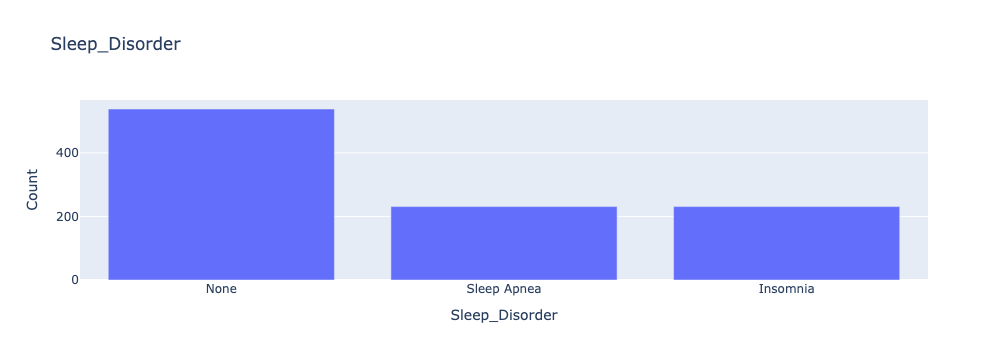

In [27]:
fig = go.Figure(data=[go.Bar(x=df['Sleep_Disorder'].value_counts().index,
                             y=df['Sleep_Disorder'].value_counts())])
fig.update_layout(
 title= 'Sleep_Disorder',
 xaxis_title="Sleep_Disorder",
 yaxis_title="Count"
 )
fig.show()

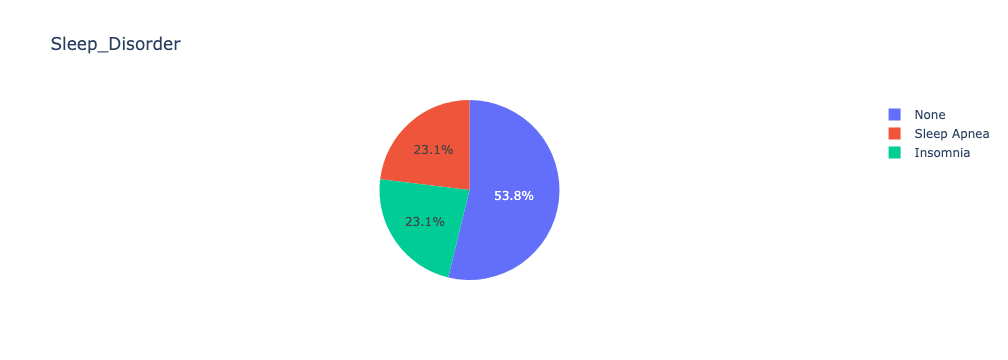

In [28]:
fig = go.Figure(data=[go.Pie(labels=df['Sleep_Disorder'].value_counts().index,
                             values=df['Sleep_Disorder'].value_counts())])
fig.update_layout(title= 'Sleep_Disorder')
fig.show()

In [30]:
df['Gender'].value_counts()

Gender
Female    513
Male      487
Name: count, dtype: int64

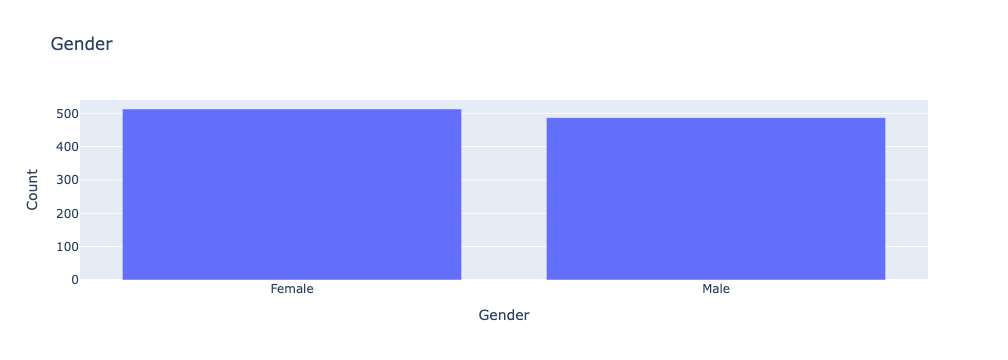

In [31]:
fig = go.Figure(data = [go.Bar(x = df['Gender'].value_counts().index,
                              y = df['Gender'].value_counts())])
fig.update_layout(
    title = 'Gender',
    xaxis_title = 'Gender',
    yaxis_title = 'Count'
)
fig.show()

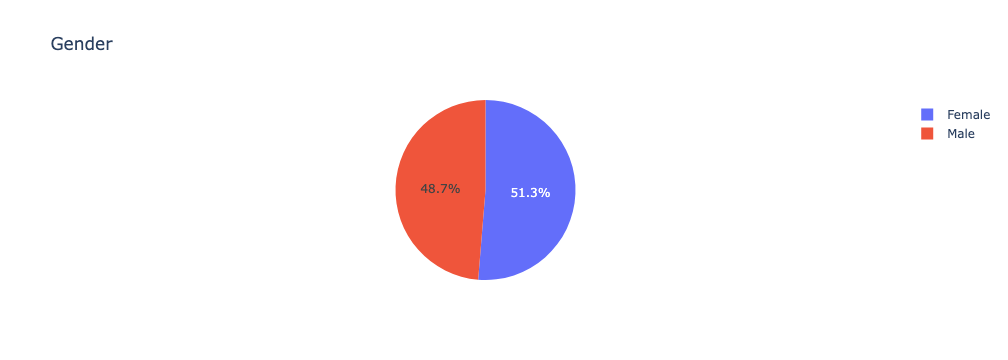

In [32]:
counts = df['Gender'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Gender')
fig.show()

In [33]:
df['Occupation'].value_counts()

Occupation
Nurse                   219
Doctor                  171
Engineer                132
Teacher                 120
Lawyer                  118
Accountant              111
Salesperson              96
Software Engineer        12
Scientist                12
Sales Representative      6
Manager                   3
Name: count, dtype: int64

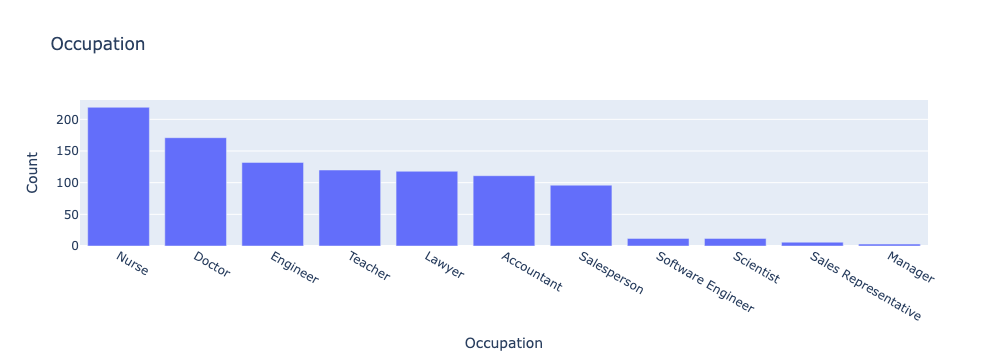

In [34]:
fig = go.Figure(data=[go.Bar(x=df['Occupation'].value_counts().index, y=df['Occupation'].value_counts())])
fig.update_layout(
 title= 'Occupation',
 xaxis_title="Occupation",
 yaxis_title="Count"
 )
fig.show()

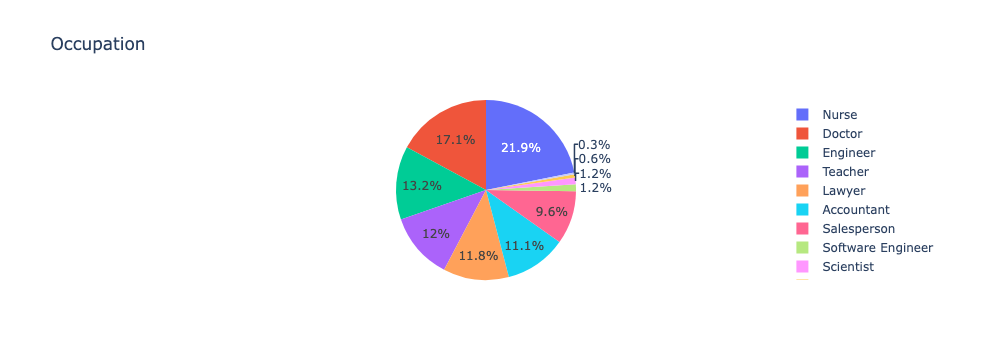

In [35]:
counts = df['Occupation'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title= 'Occupation')
fig.show()

In [37]:
df['BMI_Category'].value_counts()

BMI_Category
Normal           463
Overweight       444
Normal Weight     63
Obese             30
Name: count, dtype: int64

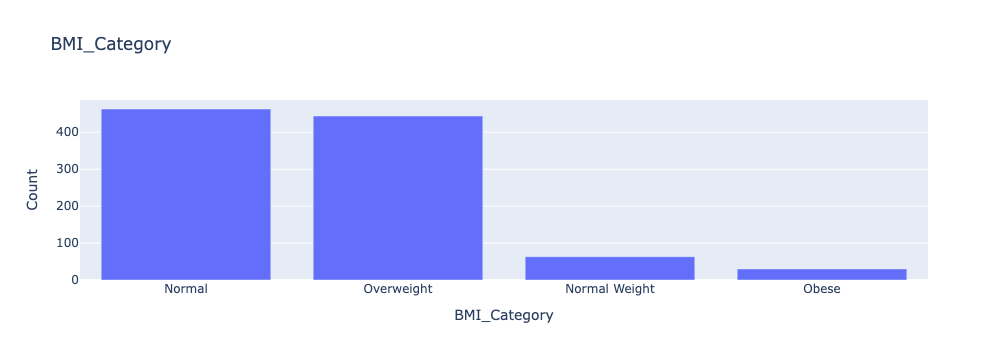

In [38]:
fig = go.Figure(data=[go.Bar(x=df['BMI_Category'].value_counts().index, y=df['BMI_Category'].value_counts())])
fig.update_layout(
 title= 'BMI_Category',
 xaxis_title="BMI_Category",
 yaxis_title="Count"
 )
fig.show()

**Stress_Level by Gender**

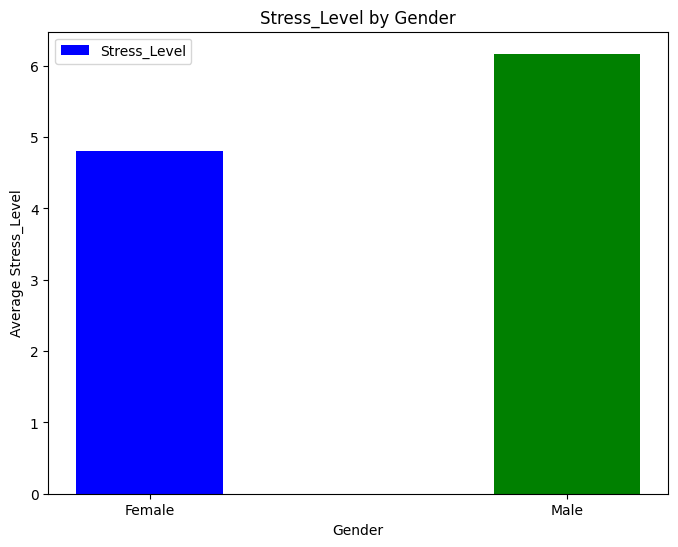

In [39]:
gender_stress = df.groupby('Gender')['Stress_Level'].mean()
x = np.arange(len(gender_stress))
width = 0.35
plt.figure(figsize=(8, 6))
plt.bar(x, gender_stress, width, label='Stress_Level', color=['blue', 'green'])
plt.xlabel('Gender')
plt.ylabel('Average Stress_Level')
plt.title('Stress_Level by Gender')
plt.xticks(x, gender_stress.index)
plt.legend()
plt.show()

**Occupation vs Daily_Steps taken**

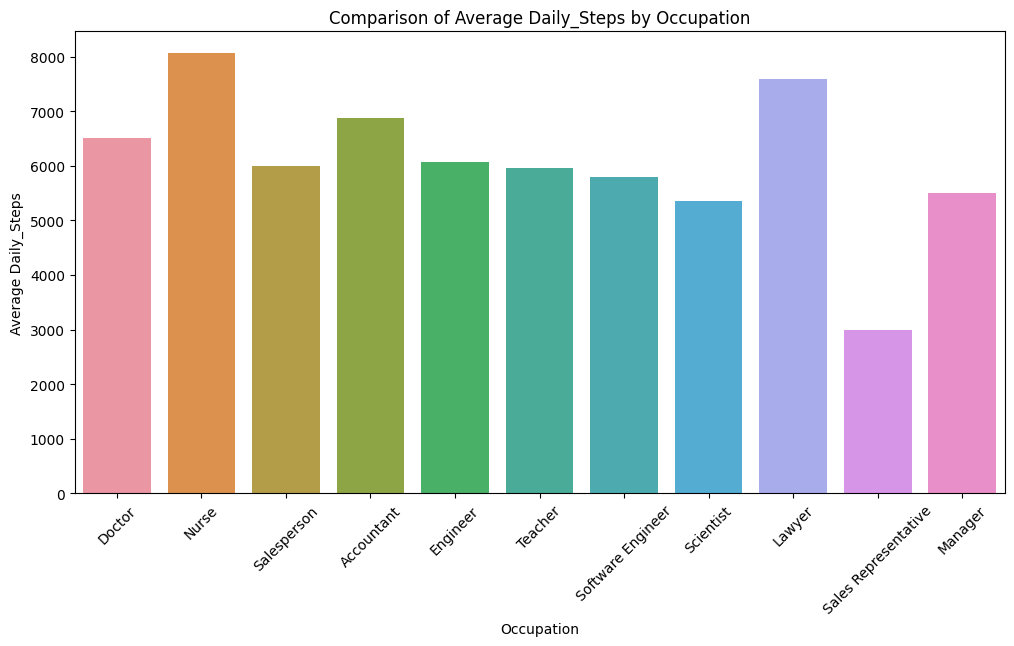

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Occupation", y="Daily_Steps", data=df, ci=None)
plt.title("Comparison of Average Daily_Steps by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Daily_Steps")
plt.xticks(rotation=45)
plt.show()

**Visualize Blood_Pressure trends by age**

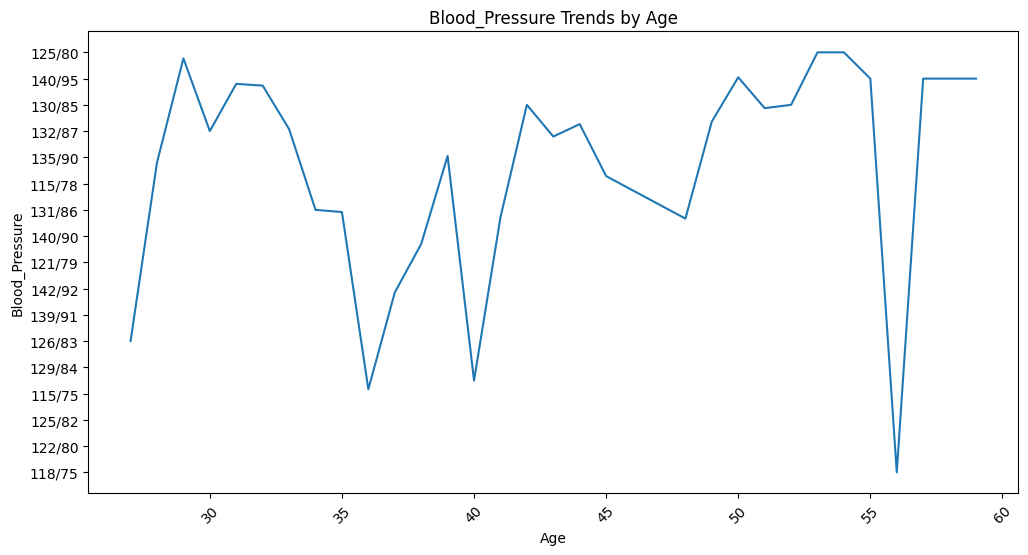

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Age", y="Blood_Pressure", data=df, ci=None)
plt.title("Blood_Pressure Trends by Age")
plt.xlabel("Age")
plt.ylabel("Blood_Pressure")
plt.xticks(rotation=45)
plt.show()

**BMI_Category Distribution**

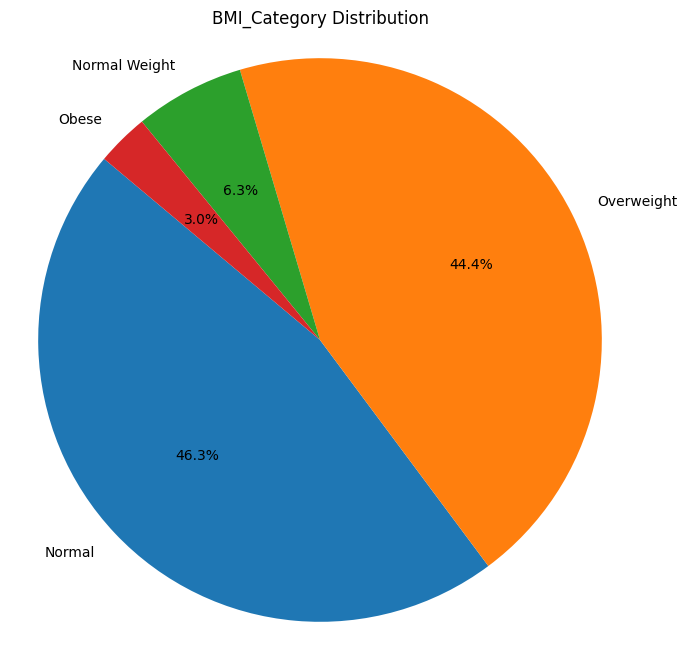

In [42]:
bmi_counts = df['BMI_Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("BMI_Category Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [43]:
df[['Systolic', 'Diastolic']] = df['Blood_Pressure'].str.split('/', expand=True).astype(int)

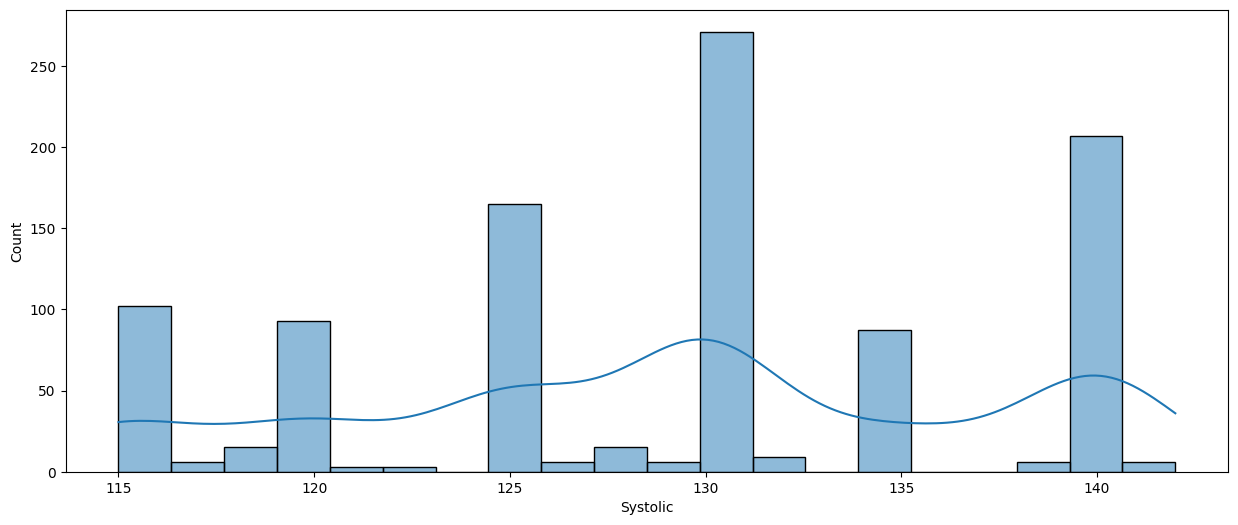

In [44]:
plt.figure(figsize=(15,6))
sns.histplot(df['Systolic'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

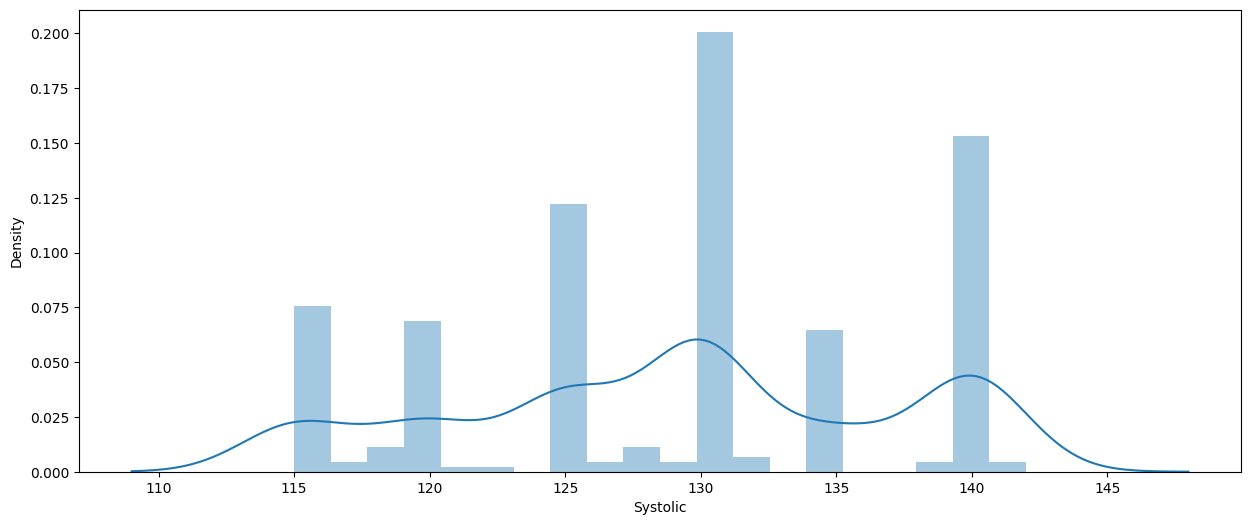

In [46]:
plt.figure(figsize=(15,6))
sns.distplot(df['Systolic'], kde = True, bins = 20)
plt.xticks(rotation = 0)
plt.show()

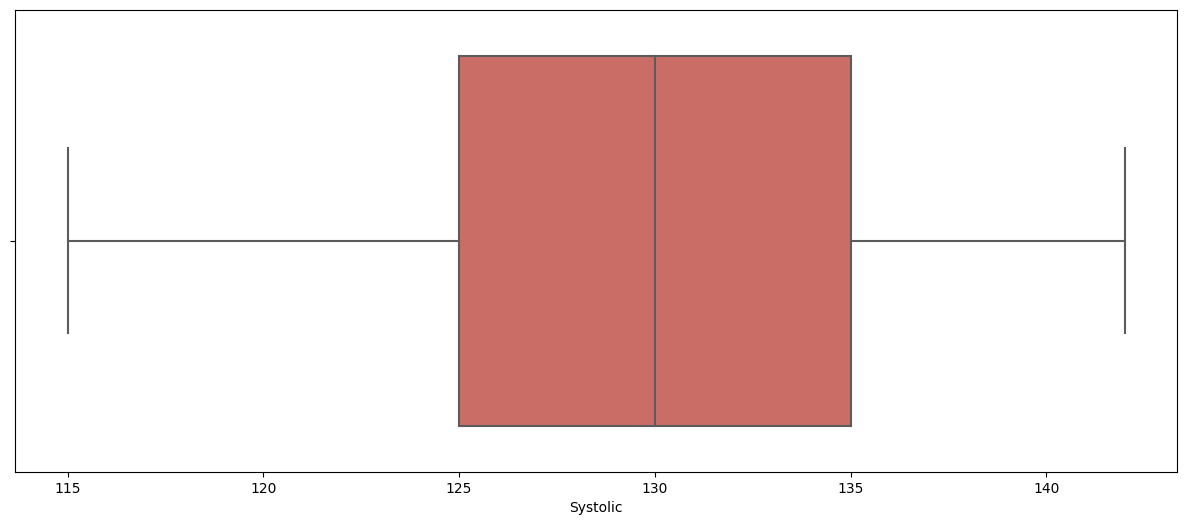

In [47]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Systolic', data=df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

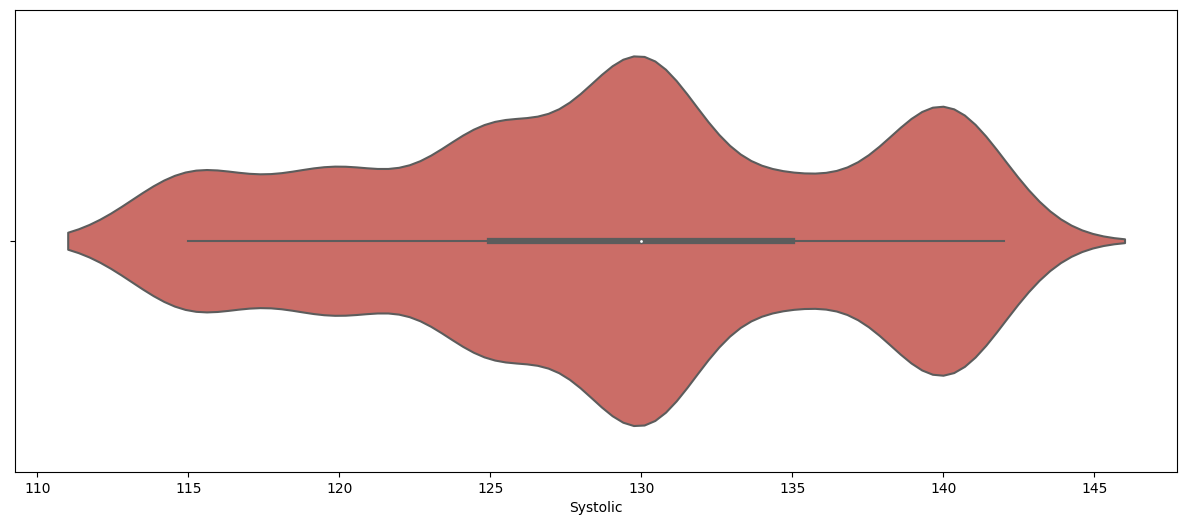

In [48]:
plt.figure(figsize=(15,6))
sns.violinplot(x = 'Systolic', data=df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

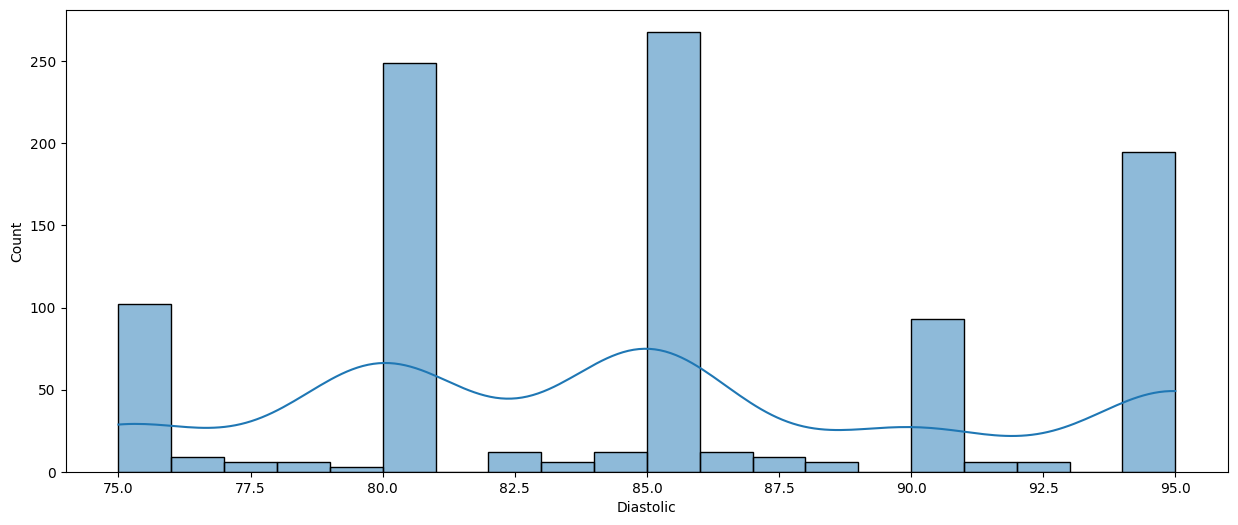

In [49]:
plt.figure(figsize=(15,6))
sns.histplot(df['Diastolic'], kde = True, bins = 20, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

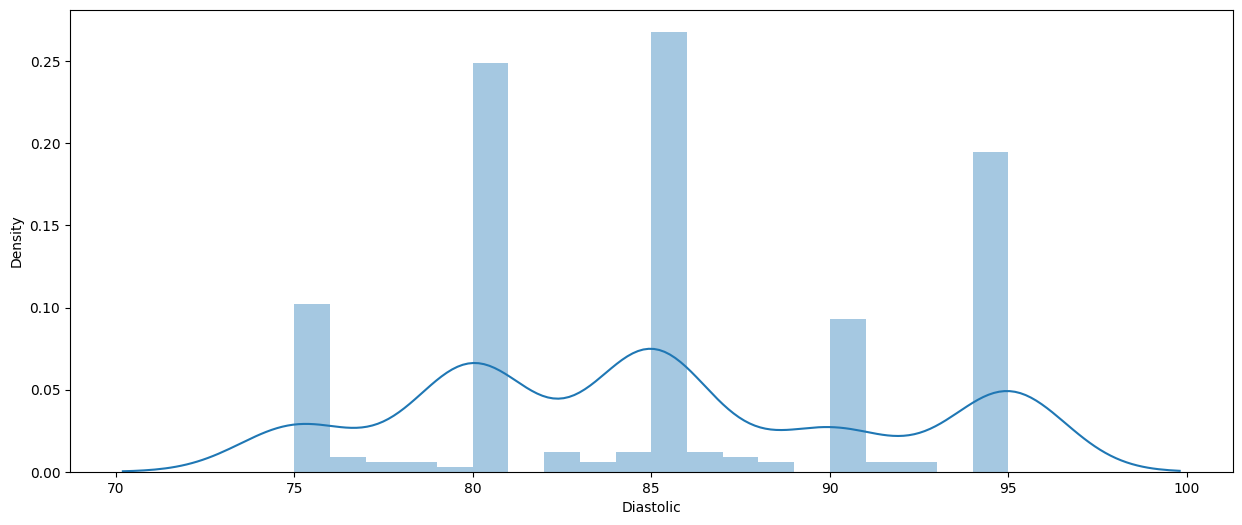

In [50]:
plt.figure(figsize=(15,6))
sns.distplot(df['Diastolic'], kde = True, bins = 20)
plt.xticks(rotation = 0)
plt.show()

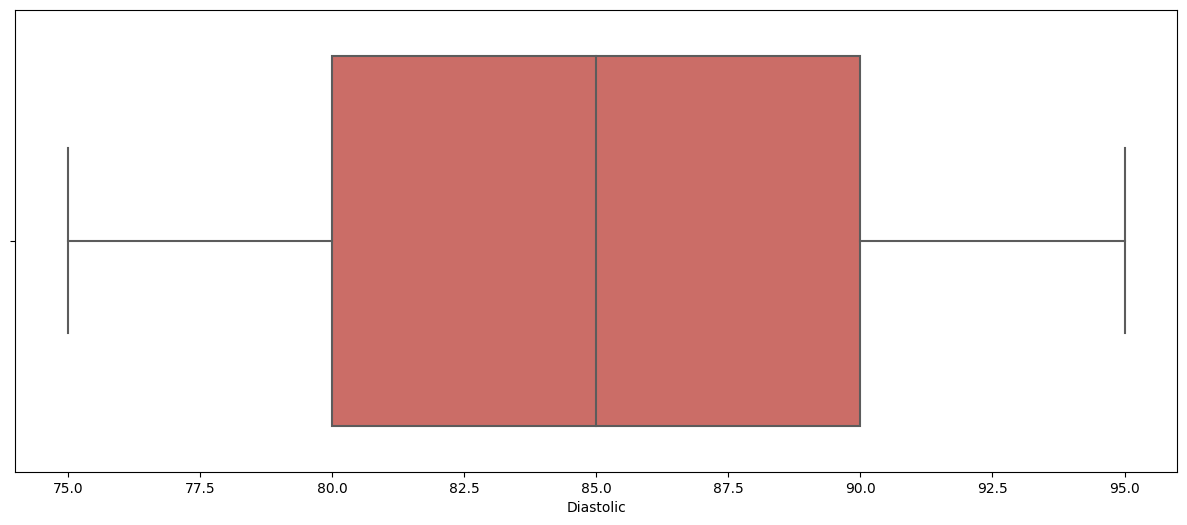

In [51]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Diastolic', data=df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

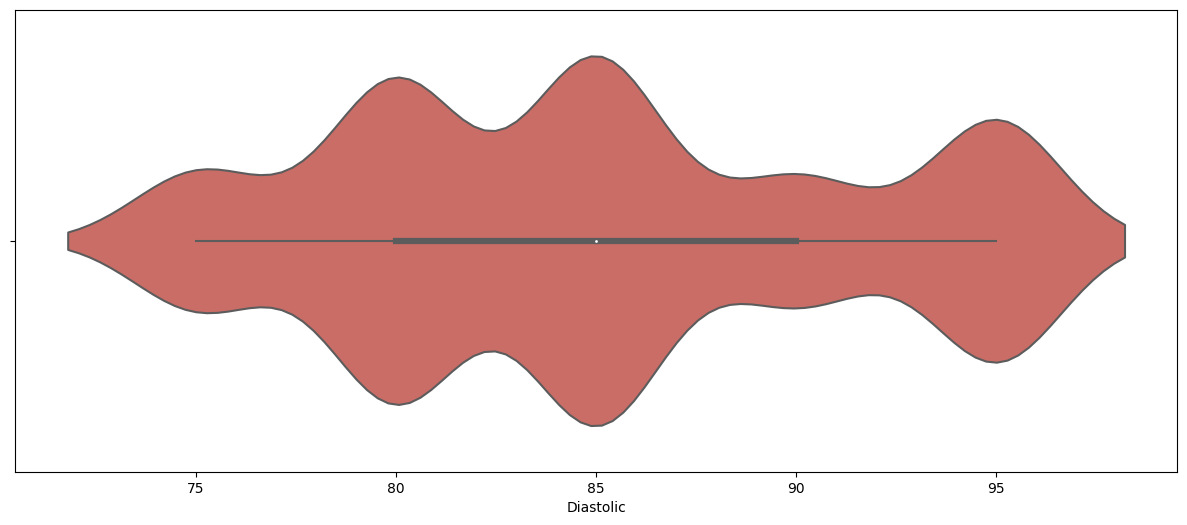

In [52]:
plt.figure(figsize=(15,6))
sns.violinplot(x = 'Diastolic', data=df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

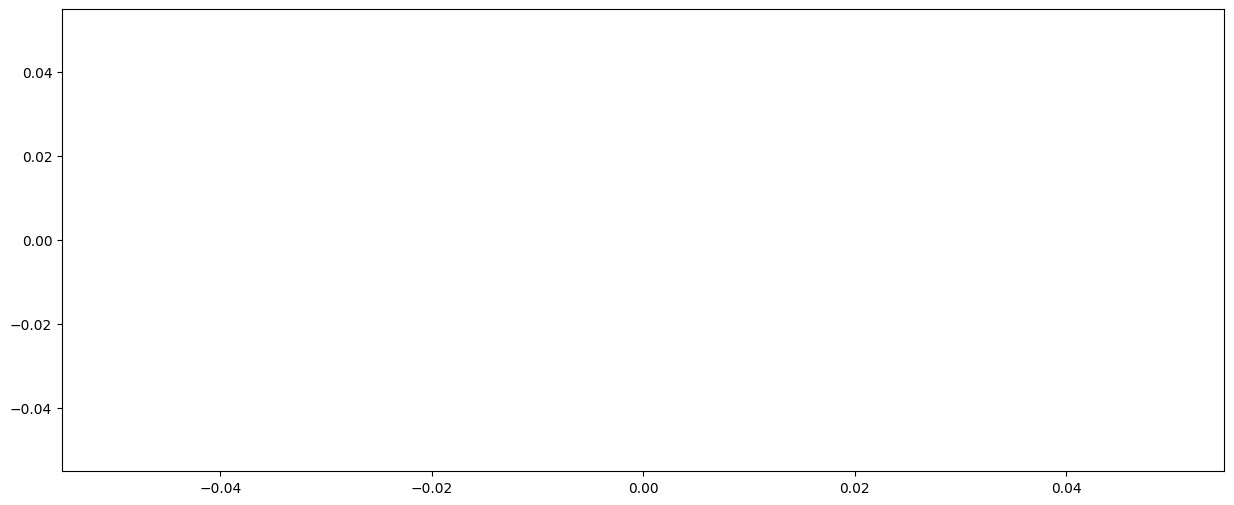

In [55]:
for i in numerical_columns:
    if i != 'Person_ID':
        plt.figure(figsize=(15,6))
        sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()

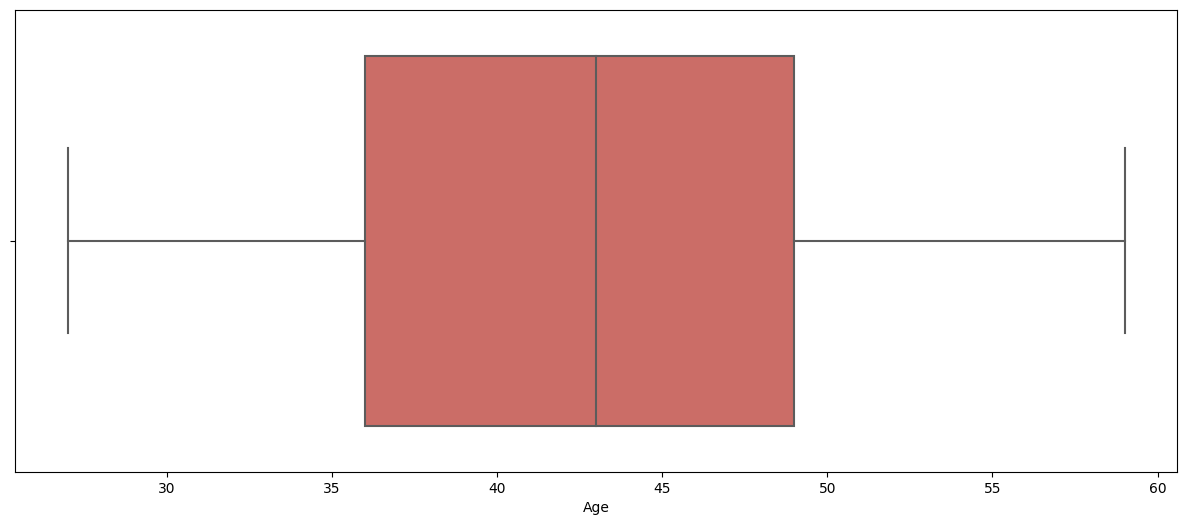

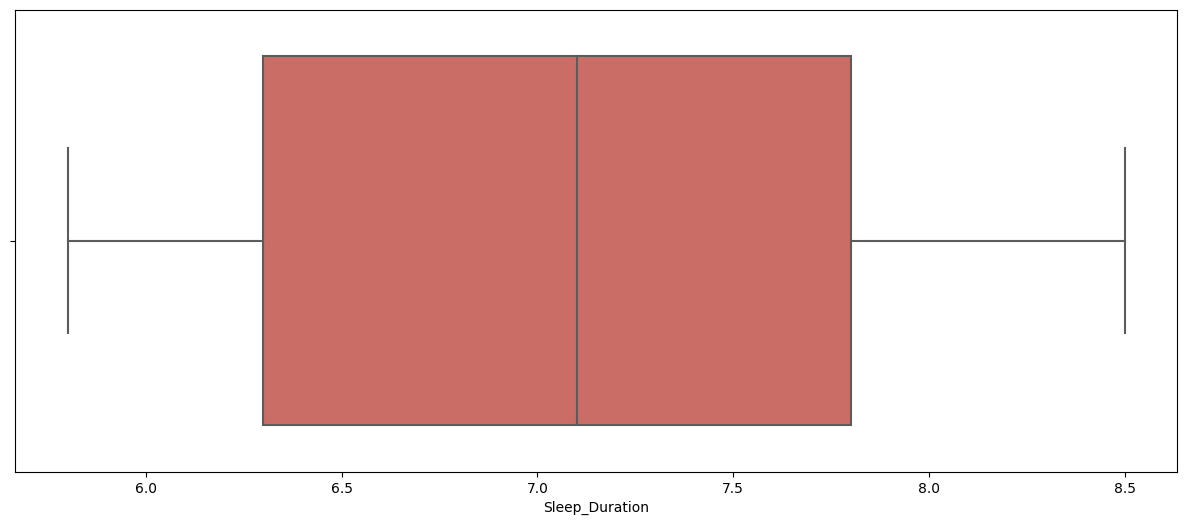

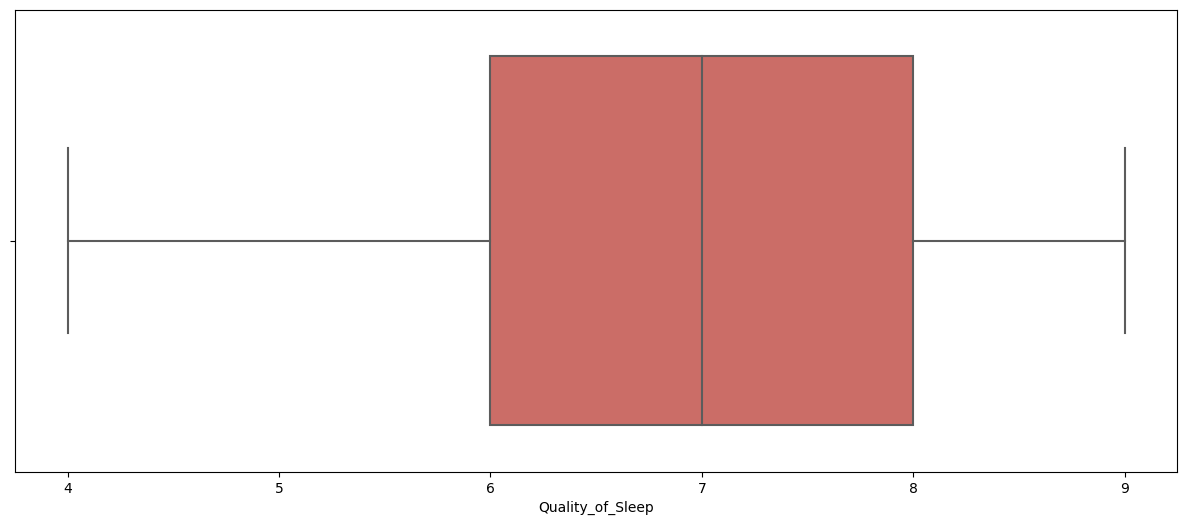

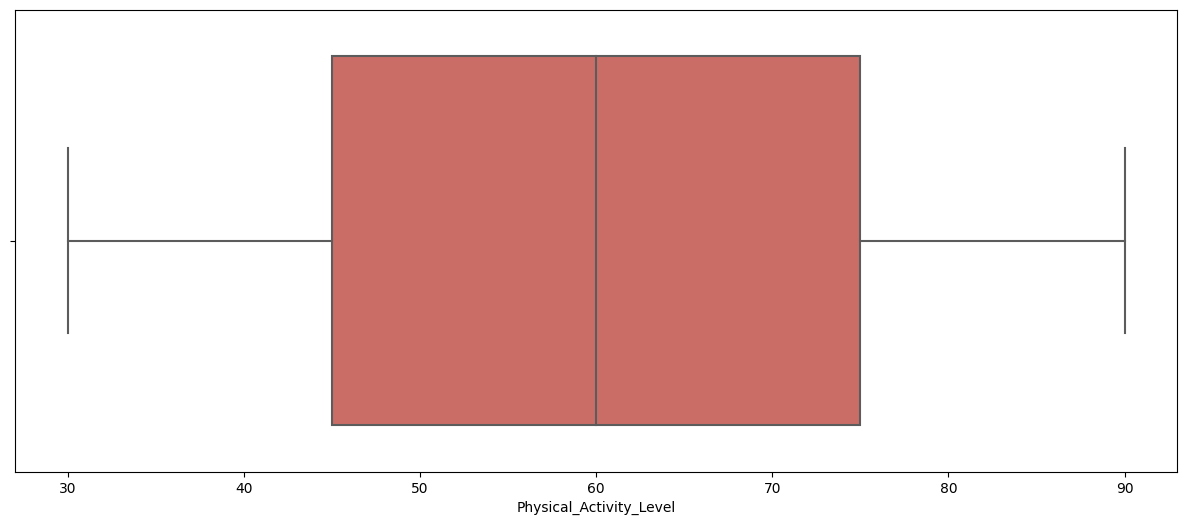

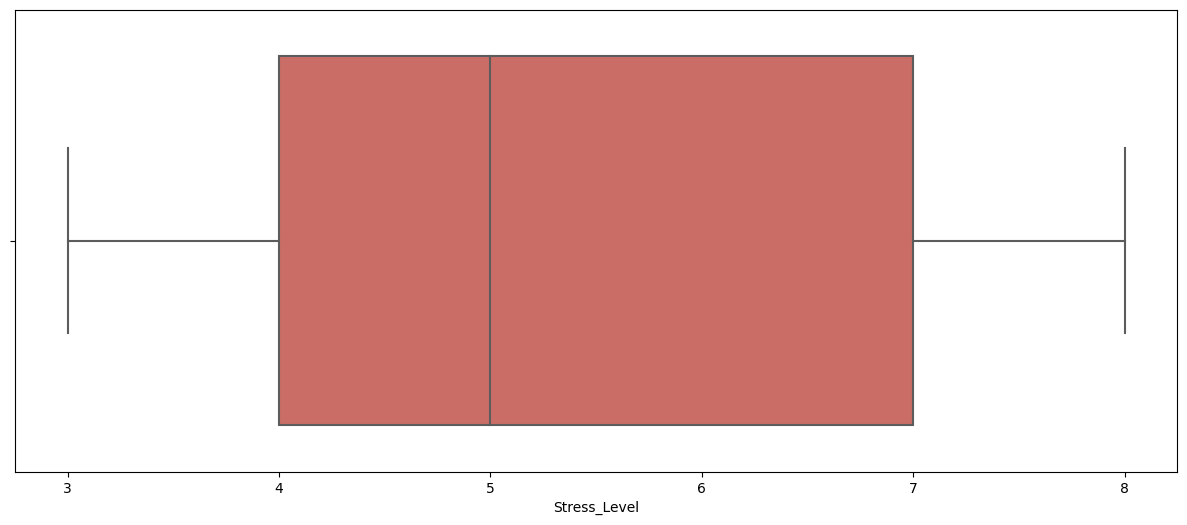

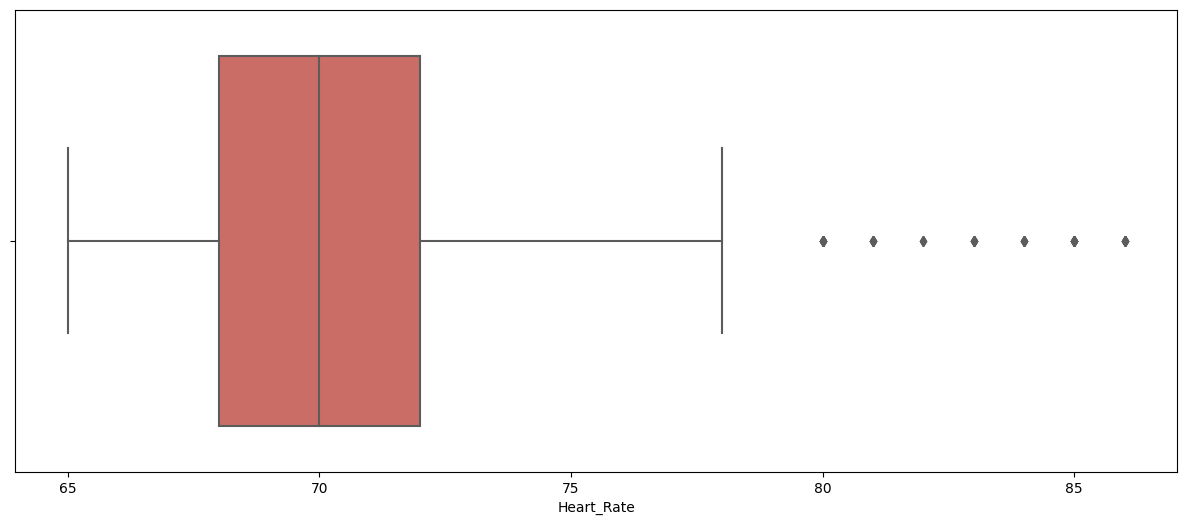

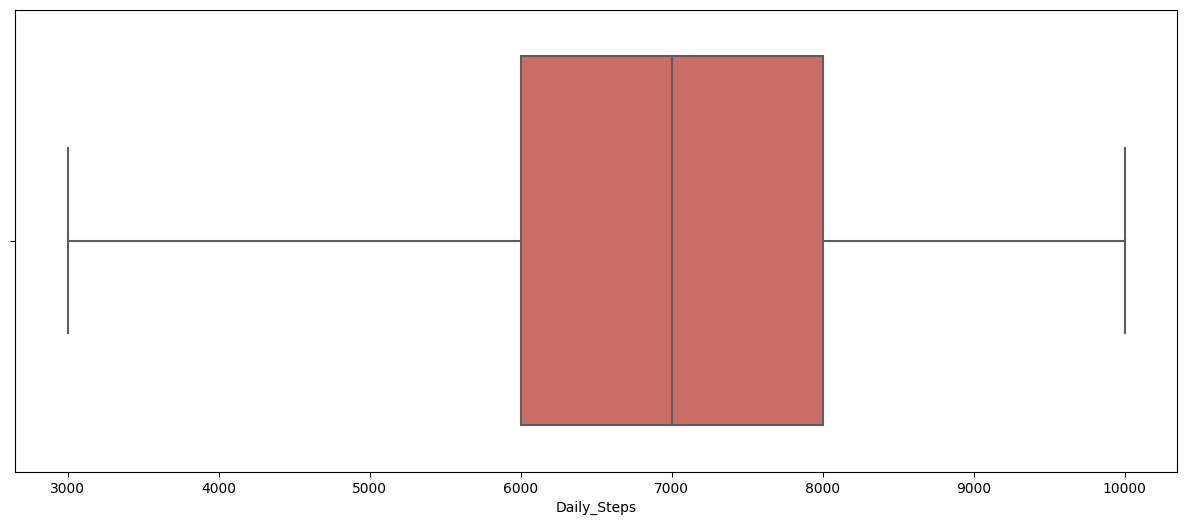

In [56]:
for i in numerical_columns:
    if i != 'Person_ID':
        plt.figure(figsize=(15,6))
        sns.boxplot(x = i, data = df, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()

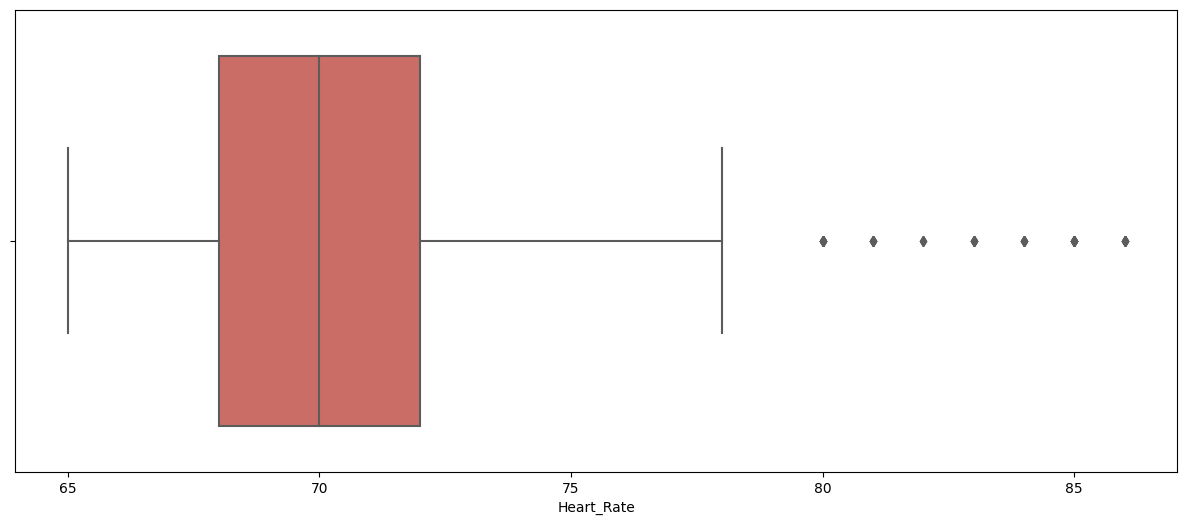

In [60]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Heart_Rate', data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

In [61]:
for i in numerical_columns:
    if i != 'Person_ID':
        plt.figure(figsize=(8,4))
        sns.violinplot(x = i, data = df, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()

TypeError: can't get common type for non-numeric array

<Figure size 800x400 with 0 Axes>

In [62]:
for i in numerical_columns:
    for j in object_columns:
        if i != 'Person_ID' and j != 'Blood_Pressure':
                plt.figure(figsize=(15,6))
                sns.violinplot(x = df[j], y = df[i], data = df, palette = 'hls')
                plt.show()

TypeError: can't get common type for non-numeric array

<Figure size 1500x600 with 0 Axes>

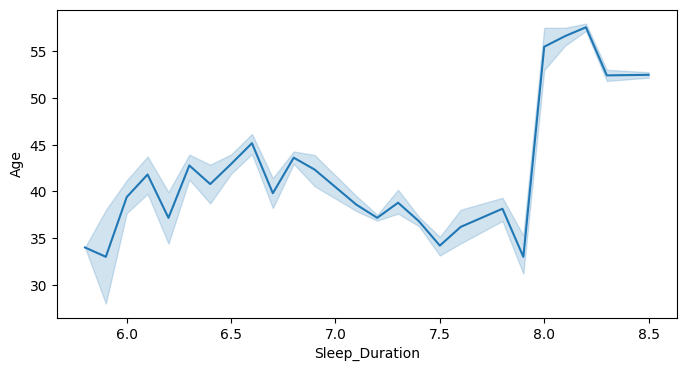

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

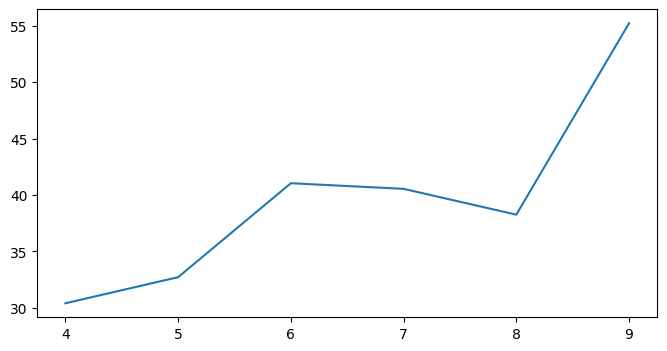

In [63]:
for i in numerical_columns:
    for j in numerical_columns:
        if i != 'Person_ID' and j != 'Person_ID':
            if i != j:
                plt.figure(figsize=(8,4))
                sns.lineplot(x = df[j], y = df[i], data = df, palette = 'hls')
                plt.show()

In [ ]:
# IQR
# Calculate the upper and lower limits
Q1 = df['Heart_Rate'].quantile(0.25)
Q3 = df['Heart_Rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(df['Heart_Rate']>=upper)[0]
df = df.drop(index = upper_array)

In [ ]:
df.columns

In [64]:
average_systolic = df['Systolic'].mean()
average_diastolic = df['Diastolic'].mean()
print(f"Average Systolic Pressure: {average_systolic}")
print(f"Average Diastolic Pressure: {average_diastolic}")

Average Systolic Pressure: 129.007
Average Diastolic Pressure: 85.027


In [65]:
# Create a copy of the DataFrame with only the selected columns
df_selected = df.copy()

In [66]:
df_selected = df_selected.drop(['Blood_Pressure',], axis = 1)

In [67]:
# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df_selected, columns=['Gender', 'Occupation', 'BMI_Category'], drop_first = True, dtype = int) 

In [68]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1000 non-null   Int64  
 1   Sleep_Duration                   1000 non-null   float64
 2   Quality_of_Sleep                 1000 non-null   Int64  
 3   Physical_Activity_Level          1000 non-null   Int64  
 4   Stress_Level                     1000 non-null   Int64  
 5   Heart_Rate                       1000 non-null   Int64  
 6   Daily_Steps                      1000 non-null   Int64  
 7   Sleep_Disorder                   1000 non-null   object 
 8   Systolic                         1000 non-null   int64  
 9   Diastolic                        1000 non-null   int64  
 10  Gender_Male                      1000 non-null   int64  
 11  Occupation_Doctor                1000 non-null   int64  
 12  Occupation_Engineer  

In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded['Sleep_Disorder'] = label_encoder.fit_transform(df_encoded['Sleep_Disorder'])

In [70]:
df_encoded.columns

Index(['Age', 'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level',
       'Stress_Level', 'Heart_Rate', 'Daily_Steps', 'Sleep_Disorder',
       'Systolic', 'Diastolic', 'Gender_Male', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Nurse', 'Occupation_Sales Representative',
       'Occupation_Salesperson', 'Occupation_Scientist',
       'Occupation_Software Engineer', 'Occupation_Teacher',
       'BMI_Category_Normal Weight', 'BMI_Category_Obese',
       'BMI_Category_Overweight'],
      dtype='object')

In [71]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

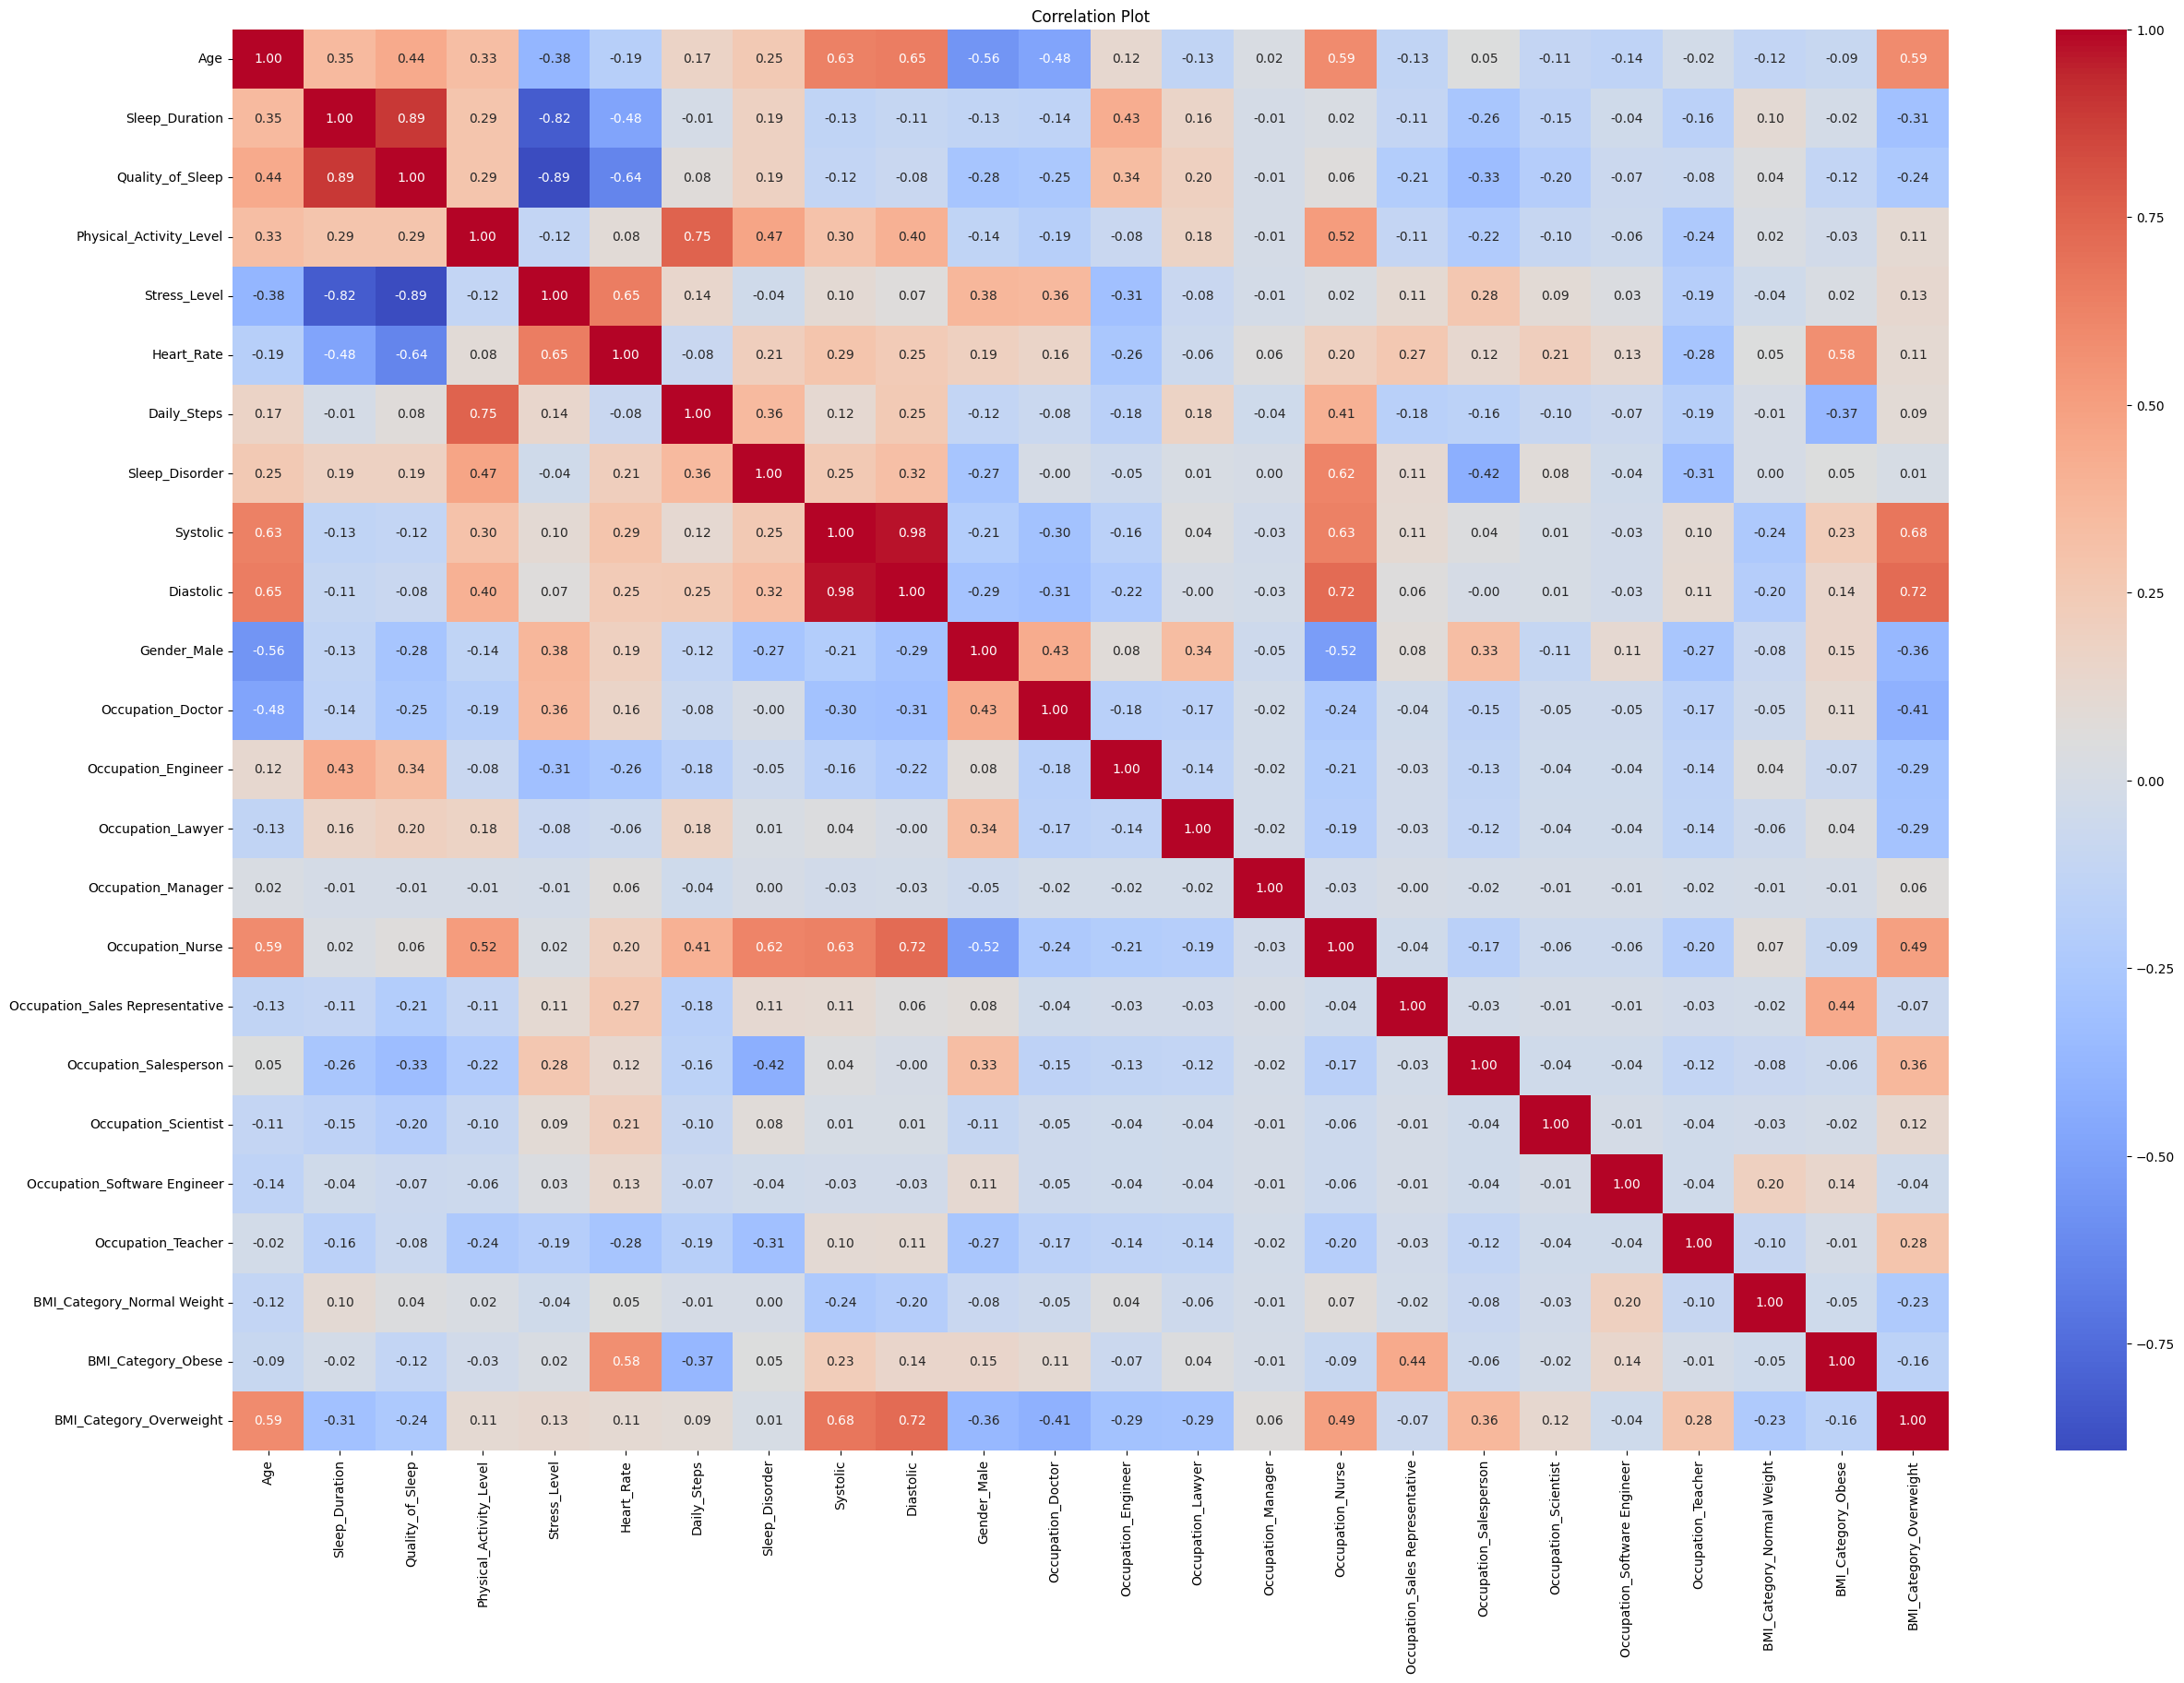

In [72]:
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X is the feature matrix and y is the target variable
X = df_encoded.drop('Sleep_Disorder', axis=1) # Drop the target variable from the featu
y = df_encoded['Sleep_Disorder']

# Create a random forest classifier
clf = RandomForestClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Get feature importance scores
feature_importance = clf.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance scores
print(feature_importance_df)

ImportError: cannot import name '_to_object_array' from 'sklearn.utils.validation' (/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py)

# Modelling

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

ImportError: cannot import name '_average' from 'sklearn.utils._array_api' (/opt/conda/lib/python3.10/site-packages/sklearn/utils/_array_api.py)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()

In [ ]:
xgb_model.fit(X_train, y_train)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)